In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statistics

In [3]:
df = pd.read_csv('salary.csv', encoding='utf8')
df.head()

,Unnamed: 0,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,salary,role,location,R,Python,SQL
0,1,Kum & Go,3.4,Senior Data Analyst,"Des Moines, IA",$59K - $84K (Glassdoor est.),"Apply business, analytic, and technical knowle...",71.5,Data Analyst,IA,1,1,1
1,2,Beam Inc.,3.8,Data Scientist - Supply Planning,"Chicago, IL",$84K - $120K (Glassdoor est.),Partner with Global S&OP functional areas (Sup...,102.0,Data Scientist,IL,1,1,1
2,3,Utah State University,4.2,Data Scientist,"Logan, UT",$71K - $108K (Glassdoor est.),"\nClean and transform, data in preparation for...",89.5,Data Scientist,UT,1,1,0
3,4,Prime Connected,2.0,Telecommunications System Technician (Data),"Providence, RI",Employer est.:$20.00 - $30.00 Per Hour,Rhode Island Telecommunications System Technic...,20.0,Others,RI,1,0,0
4,5,Bloomberg Industry Group,3.6,Data Scientist,"Washington, DC",Employer est.:$110K - $130K,"Proactively explore, research, describe, and a...",120.0,Data Scientist,DC,1,1,1


In [4]:
data = df['salary']

[Text(0.5, 1.0, 'Data Scientist Salary Density'), Text(0.5, 0, 'Salary(k)')]

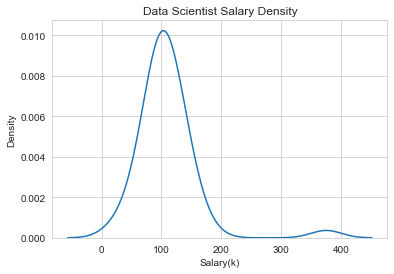

In [7]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw_method=0.5).set(title="Data Scientist Salary Density",xlabel='Salary(k)')

In [56]:
statistics.median(data) # Note that it's k

102.5

### Median Salary by Job Title

Should display a dataframe and a graph.

In [57]:
# Medium Salary by Role
df[['salary','role']].groupby('role').median()

,salary
role,
Data Analyst,101.0
Data Engineer,100.0
Data Scientist,109.0
Machine Learning,69.0
Others,20.0


/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Data Scientist Salary by Role'), Text(0.5, 0, 'Salary(k)')]

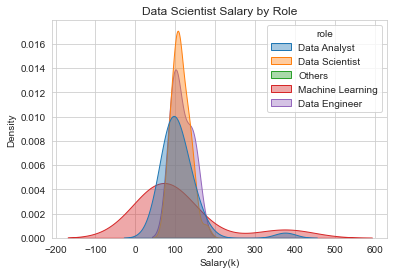

In [8]:
sns.kdeplot(data = df[['salary','role']], x = "salary", hue = "role", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Role",xlabel='Salary(k)')

### Median Salary by Location

Top 5 highest paid location

In [10]:
df_loc = df[['location', 'salary']].groupby('location').median().sort_values(by=['salary'],ascending = False).head(6)
df_loc

,salary
location,
NY,375.0
MO,177.0
CO,149.5
CT,136.0
FL,130.0
VA,116.0


In [11]:
list = [df_loc.index[1], df_loc.index[2], df_loc.index[3], df_loc.index[4], df_loc.index[5]]
list

['MO', 'CO', 'CT', 'FL', 'VA']

/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Data Scientist Salary by Location'),
 Text(0.5, 0, 'Salary(k)')]

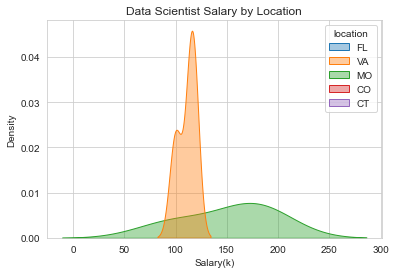

In [12]:
df_new = df[df.location.isin(list)]
sns.kdeplot(data = df_new[['salary','location']], x = "salary", hue = "location", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Location",xlabel='Salary(k)')

In [85]:
df_new['location'].value_counts()

VA    6
FL    4
CO    4
MO    3
CT    2
Name: location, dtype: int64

### Most Common Skill

In [86]:
df[['R','Python','SQL']].value_counts()

R  Python  SQL
1  1       1      39
   0       0      22
   1       0      12
0  0       0       8
1  0       1       4
0  1       1       1
dtype: int64

In [87]:
df[['R', 'Python', 'SQL']].sum(axis = 0) / df.shape[0]

R         0.895349
Python    0.604651
SQL       0.511628
dtype: float64

In [92]:
df_R = df[['R', 'salary']].groupby('R').mean()
df_Py = df[['Python', 'salary']].groupby('Python').mean()
df_Sql = df[['SQL', 'salary']].groupby('SQL').mean()
print(df_R)
print(df_Py)
print(df_Sql) 

       salary
R            
0  100.500000
1  110.448052
            salary
Python            
0        97.205882
1       117.384615
         salary
SQL            
0    109.880952
1    108.954545
